# Part 1: Exploratory Data Analysis (EDA)

##1.1 Overview of the Data

---



In [16]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Shape of DataFrame: (55702, 27)

Column Data Types:
 ID                       int64
gender                  object
age                    float64
height(cm)               int64
weight(kg)             float64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
dtype: object

Summary Statistics:
                  ID           age    height(cm)    weight(kg)     waist(cm

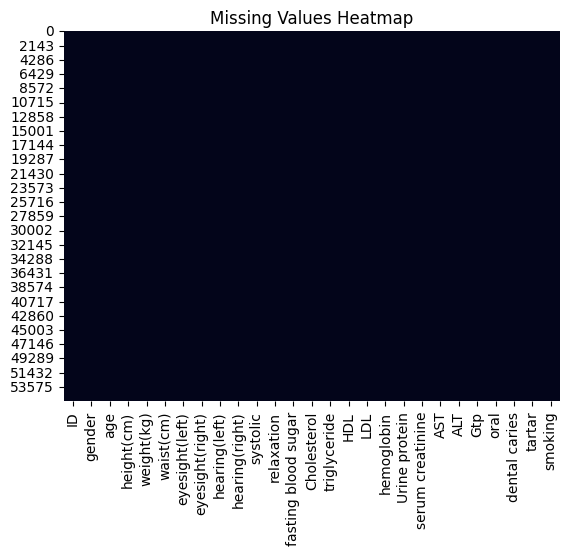

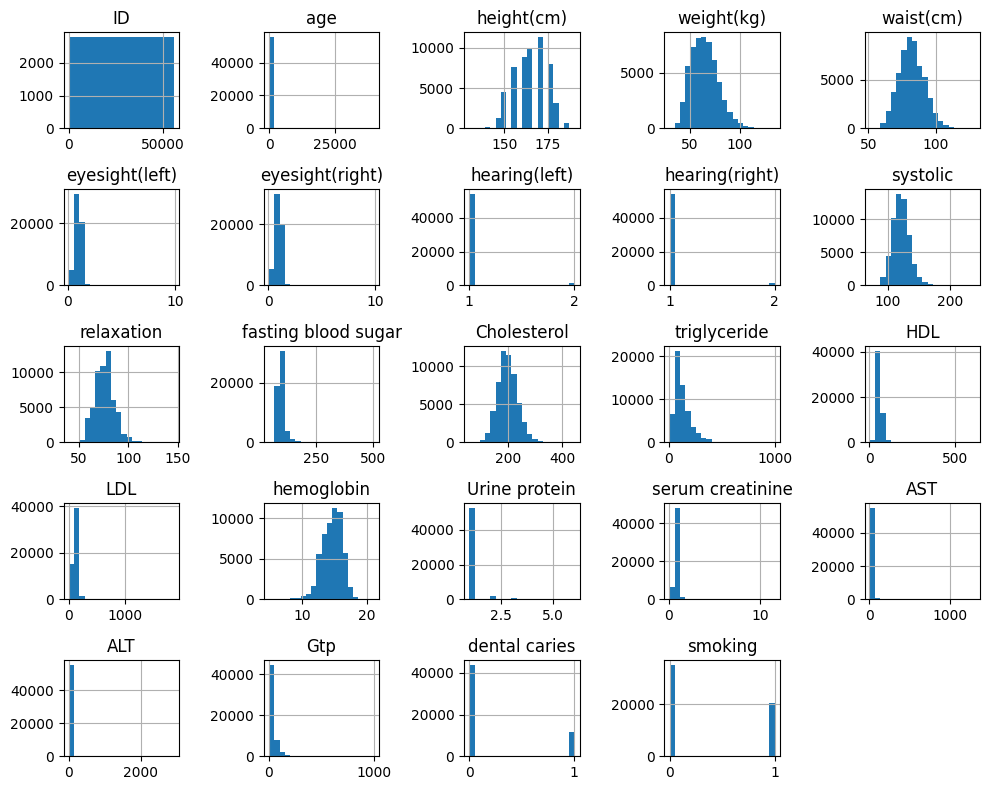

In [19]:
import pandas as pd
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
import seaborn as sns


def show_dataframe_in_window(df):
    root = tk.Tk()
    root.title("DataFrame Viewer")

    frame = ttk.Frame(root)
    frame.pack(fill=tk.BOTH, expand=True)

    tree = ttk.Treeview(frame)
    tree.pack(fill=tk.BOTH, expand=True)

    # Define columns
    tree["columns"] = list(df.columns)
    tree["show"] = "headings"

    for column in df.columns:
        tree.heading(column, text=column)

    for index, row in df.iterrows():
        tree.insert("", "end", values=list(row))

    root.mainloop()

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Projects/health_data/dataset.csv')

#basic info to get handy on dataset
print("Shape of DataFrame:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

#print missing values and visualize them using seaborn
print("\nMissing Values per Column:\n", df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

In [ ]:
#Counts number of columns
shape = df.shape
Column_number = shape[1]
print(Column_number)

27


In [ ]:
#Gives names of all columns
list(df.columns.values)

['ID',
 'gender',
 'age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'oral',
 'dental caries',
 'tartar',
 'smoking']

In [ ]:
#Gives lenght of the dataframe --> number of values
len(df)

55702

In [ ]:
#data encoding
df['oral'].replace({'Y': '1'}, inplace=True)
df['oral'].replace({'N': '0'}, inplace=True)
df['tartar'].replace({'Y': '1'}, inplace=True)
df['tartar'].replace({'N': '0'}, inplace=True)
df['gender'].replace({'M': '1'}, inplace=True)
df['gender'].replace({'F': '0'}, inplace=True)

print(df)

          ID gender   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0      0  40.0         155        60.0       81.3             1.2   
1          1      0  40.0         160        60.0       81.0             0.8   
2          2      1  55.0         170        60.0       80.0             0.8   
3          3      1  40.0         165        70.0       88.0             1.5   
4          4      0  40.0         155        60.0       86.0             1.0   
...      ...    ...   ...         ...         ...        ...             ...   
55697  55676      0   NaN         170         NaN       75.0             0.9   
55698  55681      0   NaN         160         NaN       70.0             1.2   
55699  55683      0   NaN         160         NaN       68.5             1.0   
55700  55684      1   NaN         165         NaN       78.0             0.8   
55701  55691      1   NaN         160         NaN       85.0             0.9   

       eyesight(right)  hearing(left)  

In [ ]:
#Returns number of null values
nan_count = df.isnull().sum().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: 12


## 1.2 Descriptive Statistics

In [ ]:
#Means for smoker
mean_smoker_age = df.loc[(df["smoking"] == 1), 'age'].mean()
mean_smoker_height = df.loc[(df["smoking"] == 1), 'height(cm)'].mean()
mean_smoker_weight = df.loc[(df["smoking"] == 1), 'weight(kg)'].mean()
print(mean_smoker_age)
print(mean_smoker_height)
print(mean_smoker_weight)

43.560813453265546
169.4354010852031
70.95937622213532


In [ ]:
#Valeurs aberrantes
import numpy as np

np.std(df['age'])
nb_abnormal = len(df[df['age'] >= 100])
df['age'].replace({'180': '18'}, inplace=True)
df['age'].replace({'1200': '21'}, inplace=True)
df['age'].replace({'3000': '30'}, inplace=True)
df['age'].replace({'40000': '40'}, inplace=True)



In [ ]:
#Gives the mean standard deviations
height_std = np.std(df['height(cm)'])
print(height_std)
weight_std = np.std(df['weight(kg)'])
print(weight_std)



9.194053318377998
12.820107340300028


In [ ]:
hemo_std = np.std(df['hemoglobin'])
print(hemo_std)


1.5644617074469538


## 	1.3 Data Distribution

---



20457
35245


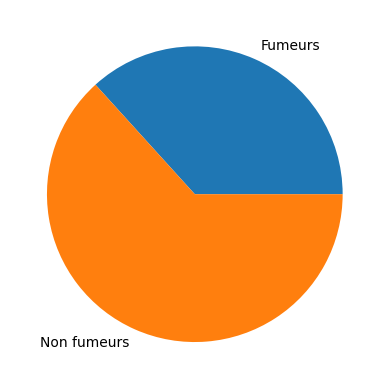

In [ ]:
#Creates a pie chart of the number of smokers and non smokers
import matplotlib.pyplot as plt
import numpy as np

fumeurs = np.sum(df["smoking"] == 1)
non_fumeurs = np.sum(df["smoking"] == 0)
print (fumeurs)
print (non_fumeurs)
y = np.array([fumeurs, non_fumeurs])
mylabels = ["Fumeurs", "Non fumeurs"]

plt.pie(y, labels = mylabels)
plt.show()


859
19598


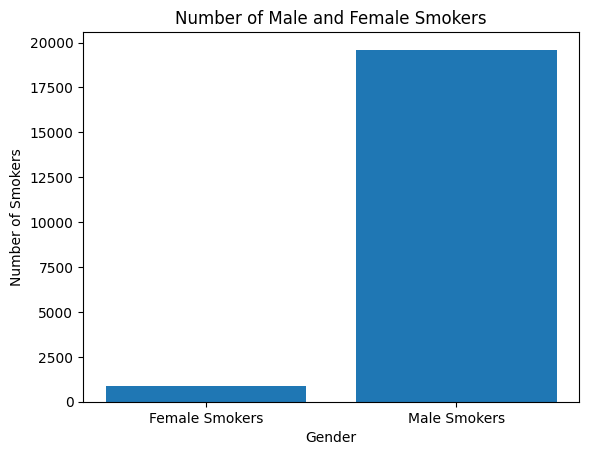

In [ ]:
#Creates an histogram of the number of male and female smokers
import matplotlib.pyplot as plt
import numpy as np

fumeurs_femmes = len(df.loc[(df["smoking"] == 1) & (df["gender"] == '0')])
print(fumeurs_femmes)
fumeurs_hommes = len(df.loc[(df["smoking"] == 1) & (df["gender"] == '1')])
print(fumeurs_hommes)

plt.bar([0, 1], [fumeurs_femmes, fumeurs_hommes])
plt.xticks([0, 1], ['Female Smokers', 'Male Smokers'])
plt.xlabel('Gender')
plt.ylabel('Number of Smokers')
plt.title('Number of Male and Female Smokers')

plt.show()


In [ ]:
#Returns the mean age of male smokers
fumeurs_hommes_mean_age = df.loc[(df["smoking"] == 1) & (df["gender"] == '1'), "age"].mean()
print(fumeurs_hommes_mean_age)

43.437005664132265


##1.4 Correlation Analysis

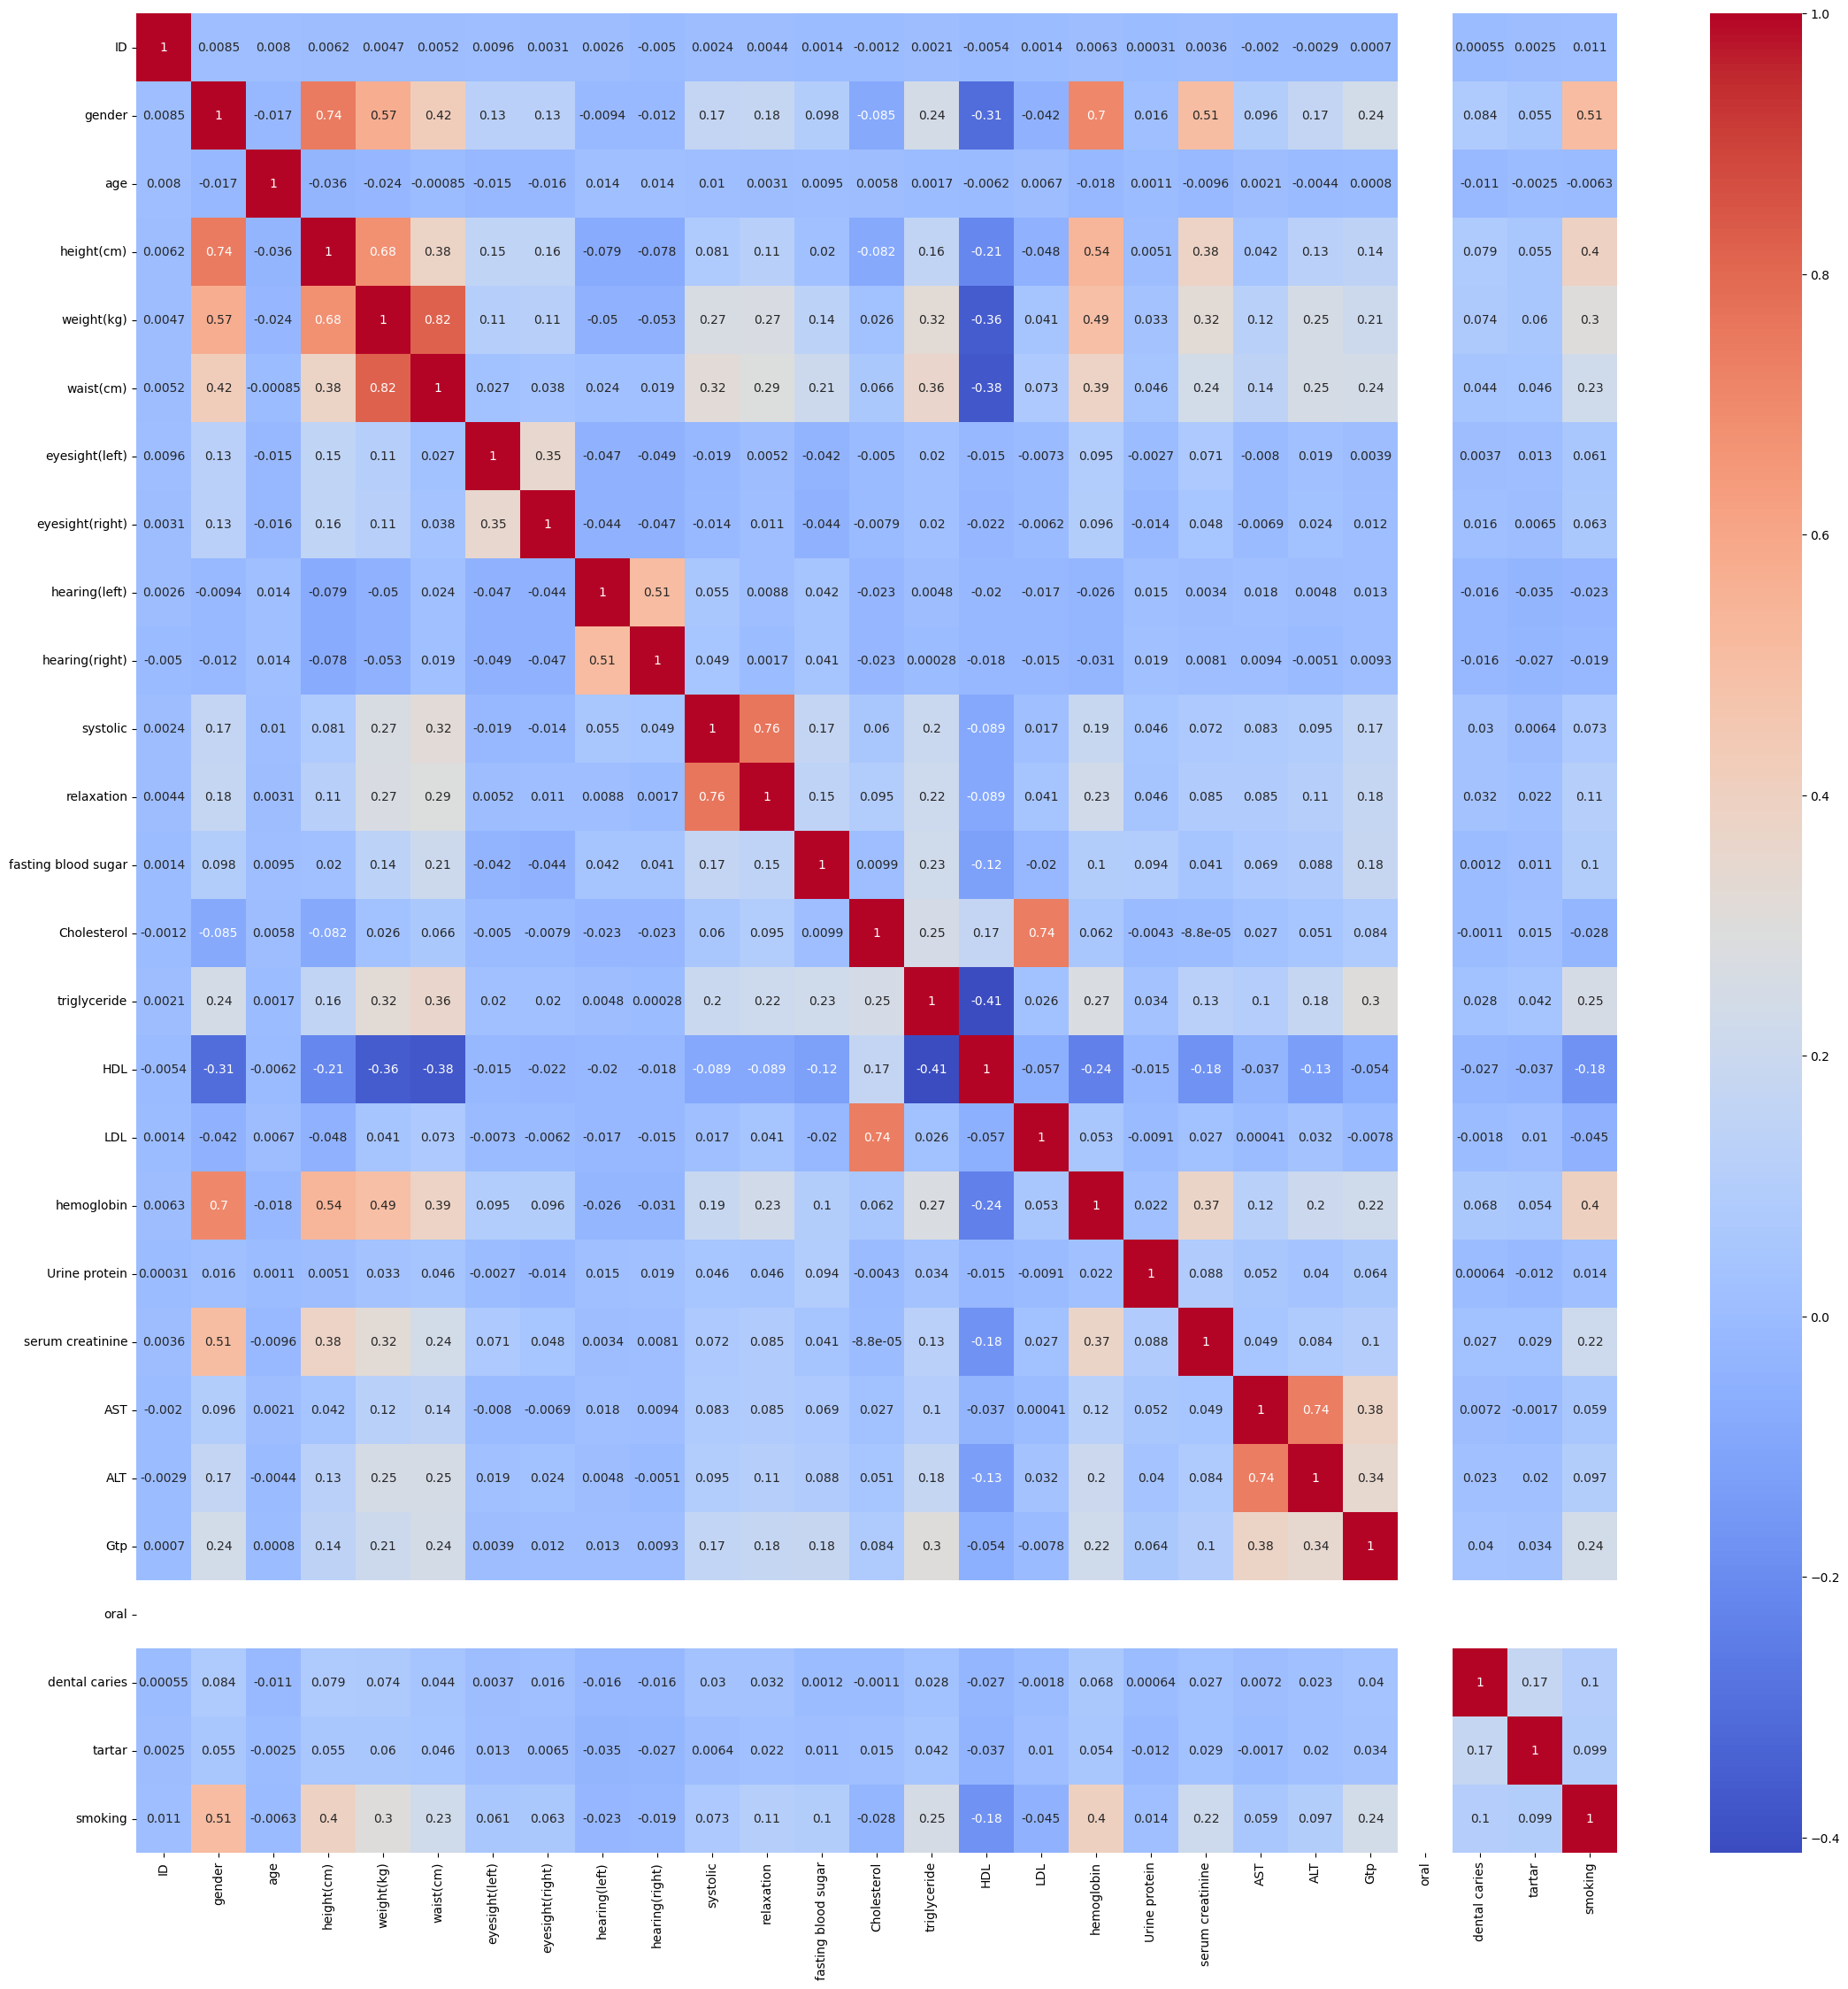

In [ ]:
#Create the correclation heatmap for our dataframe --> no problem because I encoded the values previously
import seaborn as sns

corr = df.corr()

plt.figure(figsize = (27,27))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)
plt.show()

The variables gender-height and gender hemoglobin are strongly correlated, which is explained by the biological differences between men and women.

The weight-waist variables are highly correlated, which is explained by the storage of fat at the abdominal belt when an individual gains weight. , or because the individual is taller as observed by the weight-height correlation.

The smoking variable is more strongly correlated with the variables gender, height(cm) and hemoglobin. If we want to confirm or deny these correlations, inferential statistics should be used.

#Part 2: Data Pre-processing

#2.1 Handling Missing Values

In [ ]:
#Removes the colums containing null values from our datframe --> we don't need them for our model
df_drop = df.dropna(axis='columns')

#	2.2 Encoding Categorical Variables


In [ ]:
#We encoded the values manually previously but we can do it automatically this way
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')


In [ ]:
#Encodes the specified colums
one_hot_encoded_data = pd.get_dummies(df, columns = ['gender', 'oral', 'tartar'])
print(one_hot_encoded_data)

          ID   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0  40.0         155        60.0       81.3             1.2   
1          1  40.0         160        60.0       81.0             0.8   
2          2  55.0         170        60.0       80.0             0.8   
3          3  40.0         165        70.0       88.0             1.5   
4          4  40.0         155        60.0       86.0             1.0   
...      ...   ...         ...         ...        ...             ...   
55697  55676   NaN         170         NaN       75.0             0.9   
55698  55681   NaN         160         NaN       70.0             1.2   
55699  55683   NaN         160         NaN       68.5             1.0   
55700  55684   NaN         165         NaN       78.0             0.8   
55701  55691   NaN         160         NaN       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  ...   AST  \
0                  1.0            1.0        

In [ ]:
#Reverts the encoding if we need to
df['oral'].replace({'1': 'Y'}, inplace=True)
df['oral'].replace({'0': 'N'}, inplace=True)
df['tartar'].replace({'1': 'Y'}, inplace=True)
df['tartar'].replace({'0': 'N'}, inplace=True)
df['gender'].replace({'1': 'M'}, inplace=True)
df['gender'].replace({'0': 'F'}, inplace=True)
print(df)

In [ ]:
#Here's how to encode it again
df['oral'].replace({'Y': '1'}, inplace=True)
df['oral'].replace({'N': '0'}, inplace=True)
df['tartar'].replace({'Y': '1'}, inplace=True)
df['tartar'].replace({'N': '0'}, inplace=True)
df['gender'].replace({'M': '1'}, inplace=True)
df['gender'].replace({'F': '0'}, inplace=True)
print(df)

          ID gender   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0      0  40.0         155        60.0       81.3             1.2   
1          1      0  40.0         160        60.0       81.0             0.8   
2          2      1  55.0         170        60.0       80.0             0.8   
3          3      1  40.0         165        70.0       88.0             1.5   
4          4      0  40.0         155        60.0       86.0             1.0   
...      ...    ...   ...         ...         ...        ...             ...   
55697  55676      0   NaN         170         NaN       75.0             0.9   
55698  55681      0   NaN         160         NaN       70.0             1.2   
55699  55683      0   NaN         160         NaN       68.5             1.0   
55700  55684      1   NaN         165         NaN       78.0             0.8   
55701  55691      1   NaN         160         NaN       85.0             0.9   

       eyesight(right)  hearing(left)  